In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets
from scipy.stats import uniform
from scipy.stats import binom

plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [4]:
data_amir = pd.read_csv('dataset/amir_deals.csv', index_col=0)

In [5]:
data_amir.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [7]:
counts_alternative = data_amir.groupby('product').size()
print(counts_alternative)

probs_alternative = counts_alternative / data_amir.shape[0]
print(probs_alternative)

product
Product A    23
Product B    62
Product C    15
Product D    40
Product E     5
Product F    11
Product G     2
Product H     8
Product I     7
Product J     2
Product N     3
dtype: int64
product
Product A    0.129213
Product B    0.348315
Product C    0.084270
Product D    0.224719
Product E    0.028090
Product F    0.061798
Product G    0.011236
Product H    0.044944
Product I    0.039326
Product J    0.011236
Product N    0.016854
dtype: float64


In [8]:
np.random.seed(24)

sample = data_amir.sample(n=5, replace=False)
print(sample)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11


In [9]:
np.random.seed(24)

sample = data_amir.sample(n=5, replace=True)
print(sample)

       product   client status   amount  num_users
163  Product D  Current    Won  6755.66         59
132  Product B  Current    Won  6872.29         25
88   Product C  Current    Won  3579.63          3
146  Product A  Current    Won  4682.94         63
146  Product A  Current    Won  4682.94         63


In [12]:
data_resto = pd.read_csv('dataset/restaurant_groups.csv')

In [13]:
data_resto.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


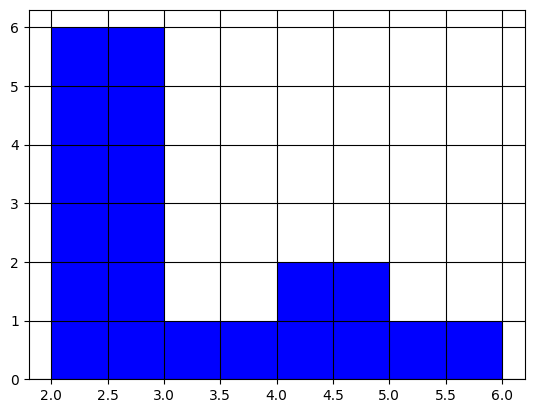

In [14]:
plt.hist(data_resto['group_size'], bins=[2, 3, 4, 5, 6], color='blue')
plt.grid(True, color='black')
plt.show()

In [17]:
# Create probability distribution
size_dist = data_resto['group_size'] / data_resto.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

# Calculate expected value
expected_value = (size_dist['group_size'] * size_dist['prob']).sum()
print(expected_value)

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

   group_size  prob
0           0   0.2
1           1   0.4
2           2   0.6
3           3   0.2
4           4   0.2
5           5   0.2
6           6   0.3
7           7   0.2
8           8   0.4
9           9   0.2
12.200000000000001
1.4999999999999998


In [40]:
# Tentukan rentang waktu minimum dan maksimum
time_range = np.arange(0, 31)  # dari 0 hingga 30 menit

# Hitung probabilitas menunggu kurang dari 5 menit
prob_no_more_than_5 = len(time_range[time_range < 5]) / len(time_range)
print(f"Probabilitas waktu tunggu untuk tidak lebih sama dengan 5 menit : {prob_no_more_than_5}")

# Hitung probabilitas menunggu lebih dari 5 menit
prob_more_than_5 = len(time_range[time_range > 5]) / len(time_range)
print(f"Probabilitas waktu tunggu untuk lebih 5 menit       : {prob_more_than_5}")

# Hitung probabilitas menunggu antara 10 hingga 20 menit
prob_between_10_and_20 = len(time_range[(time_range >= 10) & (time_range <= 20)]) / len(time_range)
print(f"Probabilitas waktu tunggu antara 10 hingga 20 menit : {prob_between_10_and_20}")

Probabilitas waktu tunggu untuk tidak lebih sama dengan 5 menit : 0.16129032258064516
Probabilitas waktu tunggu untuk lebih 5 menit       : 0.8064516129032258
Probabilitas waktu tunggu antara 10 hingga 20 menit : 0.3548387096774194


In [41]:
min = 0
max = 30

# Menghitung probabilitas waktu tunggu untuk tidak lebih sama dengan 5 menit
prob_no_more_than_5= uniform.cdf(5, min, max)
print(f"Probabilitas waktu tunggu untuk tidak lebih sama dengan 5 menit : {prob_no_more_than_5}")

# Menghitung probabilitas waktu tunggu untuk lebih 5 menit
prob_more_than_5 = 1 - uniform.cdf(5, min, max)
print(f"Probabilitas waktu tunggu untuk lebih 5 menit        : {prob_more_than_5}")

# Menghitung probabilitas waktu tunggu antara 10-20 menit
prob_between_10_20 = uniform.cdf(20, min, max) - uniform.cdf(10, min, max)
print(f"Probabilitas waktu tunggu antara 1o hingga 20 menit  : {prob_between_10_20}")

Probabilitas waktu tunggu untuk tidak lebih sama dengan 5 menit : 0.16666666666666666
Probabilitas waktu tunggu untuk lebih 5 menit        : 0.8333333333333334
Probabilitas waktu tunggu antara 1o hingga 20 menit  : 0.3333333333333333


[ 7.144097    0.97455866  3.72802787  5.11644319  8.70602482 24.69140099
 23.98012075  3.19592668 25.1985306  17.89048629]


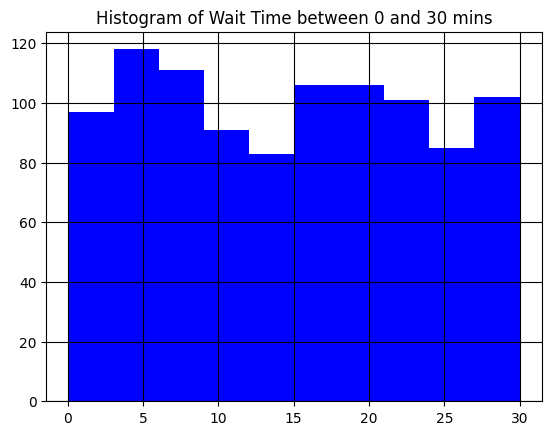

In [34]:
np.random.seed(334)

min = 0
max = 30

wait = uniform.rvs(loc=min, scale=max, size=1000)
print(wait[:10])

plt.hist(wait, bins=10, color='blue')
plt.title('Histogram of Wait Time between 0 and 30 mins')
plt.grid(True, color='black')

In [42]:
np.random.seed(10)

# Simulasi untuk satu kesepakatan dengan probabilitas 0.3
single_deal = np.random.binomial(1, 0.3)
print(f"Probabilitas satu kesepakatan : {single_deal}")

# Simulasi untuk satu minggu dengan 3 kesepakatan
one_week_deals = np.random.binomial(3, 0.3)
print(f"Probabilitas satu minggu dengan 3 kesepakatan : {one_week_deals}")

# Simulasi untuk 52 minggu dengan 3 kesepakatan per minggu
weekly_deals = np.random.binomial(3, 0.3, 52)

# Hitung rata-rata kesepakatan yang berhasil per minggu
average_deals_per_week = weekly_deals.mean()
print(f"Rata-rata kesepakatan : {average_deals_per_week}")

Probabilitas satu kesepakatan : 1
Probabilitas satu minggu dengan 3 kesepakatan : 0
Rata-rata kesepakatan : 0.8461538461538461


In [43]:
# Menghitung peluang menutup tepat 3 dari 3 kesepakatan
prob_all_closed = binom.pmf(k=3, n=3, p=0.3)
print(prob_all_closed)

# Menghitung peluang menutup maksimal 1 kesepakatan dari 3
prob_max_1 = sum(binom.pmf(k, 3, 0.3) for k in range(2))
print(prob_max_1)

# Menghitung peluang menutup lebih dari 1 kesepakatan dari 3
prob_more_than_1 = sum(binom.pmf(k, 3, 0.3) for k in range(2, 4))
print(prob_more_than_1)

0.027
0.7839999999999997
0.21599999999999991


In [44]:
win_rates = [0.3, 0.25, 0.35]
games_played = 3

# Menghitung jumlah kemenangan yang diharapkan untuk setiap persentase kemenangan
expected_wins = [games_played * rate for rate in win_rates]

# Cetak hasil
for rate, win in zip(win_rates, expected_wins):
    print(f"Expected wins with {int(rate * 100)}% win rate: {win}")

Expected wins with 30% win rate: 0.8999999999999999
Expected wins with 25% win rate: 0.75
Expected wins with 35% win rate: 1.0499999999999998
